# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/traceymartin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
from newsapi import NewsApiClient

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)


In [7]:
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
3,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912
4,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000


In [8]:
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898
1,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
2,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
3,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
4,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812


In [9]:
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.011390,0.057250,0.048450,0.894300
std,0.397068,0.063264,0.038942,0.061757
min,-0.542300,0.000000,0.000000,0.775000
25%,-0.310275,0.000000,0.000000,0.848500
50%,0.000000,0.050500,0.063000,0.907000
75%,0.233500,0.084000,0.078750,0.927250
max,0.735100,0.197000,0.104000,1.000000


In [10]:
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.039590,0.087550,0.062100,0.850300
std,0.523708,0.109526,0.073533,0.117134
min,-0.784500,0.000000,0.000000,0.594000
25%,-0.322475,0.000000,0.000000,0.794000
50%,0.000000,0.061000,0.054000,0.854500
75%,0.433875,0.101500,0.099000,0.935500
max,0.932700,0.349000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth 

Q: Which coin had the highest compound score?

A: Eth

Q. Which coin had the highest positive score?

A: Eth 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    words=word_tokenize(text)

   
    words=list(filter(lambda w:w.lower(),words))
    
    words=list(filter(lambda w:w not in punctuation,words))

   
    words=list(filter(lambda w:w.lower() not in stop,words))
    
    
    tokens=[wnl.lemmatize(word) for word in words] 
    
    
    return tokens

In [14]:
btc['tokens']=btc.text.apply(tokenizer)

In [15]:
eth['tokens']=eth.text.apply(tokenizer)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Cash', 'App'), 3),
 (('Wikipedia', 'editor'), 2),
 (('Wikimedia', 'Foundation'), 2),
 (('Jack', 'Dorsey'), 2),
 (('German', 'authority'), 2),
 (('25.2', 'million'), 2),
 (('million', 'USD'), 2),
 (('char', 'April'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('App', 'user'), 2),
 (('credit', 'card'), 2),
 (('29', 'Reuters'), 2),
 (('set', 'open'), 1),
 (('open', 'later'), 1),
 (('later', 'year'), 1),
 (('year', 'buy'), 1),
 (('buy', 'something'), 1),
 (('something', 'Verge'), 1),
 (('Verge', 'link'), 1),
 (('link', 'Vox'), 1)]

In [19]:
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'April'), 4),
 (('sentenced', 'five'), 2),
 (('five', 'year'), 2),
 (('North', 'Korea'), 2),
 (('April', '26'), 2),
 (('26', 'Reuters'), 2),
 (('Digital', 'thief'), 1),
 (('thief', 'pulled'), 1),
 (('pulled', 'another'), 1),
 (('another', 'major'), 1),
 (('major', 'crypto'), 1),
 (('crypto', 'heist'), 1),
 (('heist', 'Motherboard'), 1),
 (('Motherboard', 'learned'), 1),
 (('learned', 'hacker'), 1),
 (('hacker', 'stole'), 1),
 (('stole', '173,600'), 1),
 (('173,600', 'Ethereum'), 1),
 (('Ethereum', '591.2'), 1),
 (('591.2', 'million'), 1)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
all_tokens=tokenizer(btc.text.str.cat())
token_count(all_tokens,10)

[('char', 20),
 ('Bitcoin', 10),
 ('million', 6),
 ('bitcoin', 6),
 ('world', 5),
 ('April', 5),
 ('Reuters', 5),
 ('Block', 4),
 ('cryptocurrency', 4),
 ('company', 4)]

In [26]:
all_tokens=tokenizer(eth.text.str.cat())
token_count(all_tokens,10)

[('char', 20),
 ('Ethereum', 7),
 ('cryptocurrency', 7),
 ('April', 5),
 ('year', 5),
 ('million', 4),
 ('Reuters', 4),
 ('crypto', 3),
 ('Ronin', 3),
 ('blockchain', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [29]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

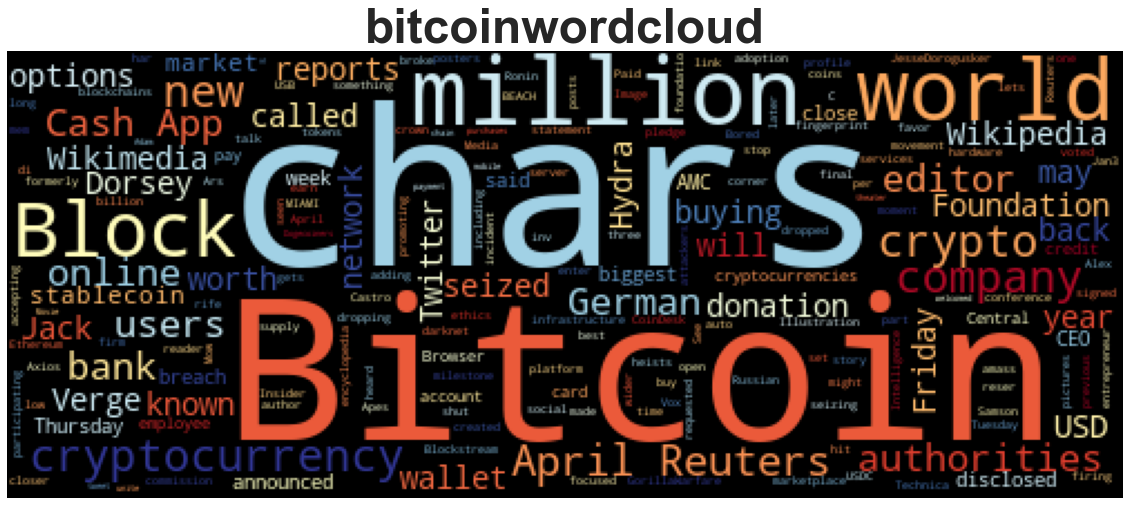

In [30]:
wordcloud(btc.text.str.cat(),title='bitcoinwordcloud')

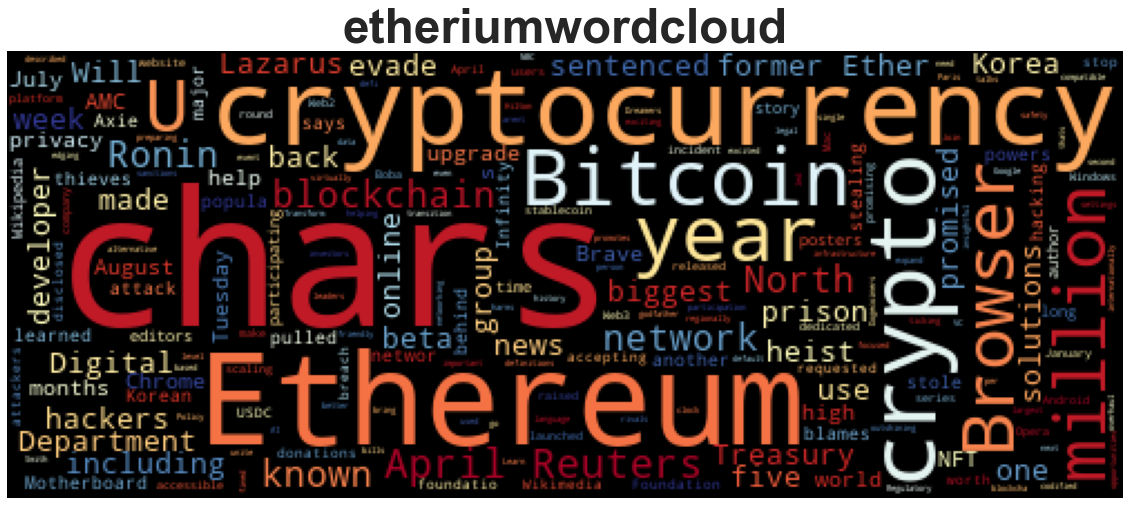

In [31]:
wordcloud(eth.text.str.cat(),title='etheriumwordcloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
btc_all=btc.text.str.cat()
btc_all



'Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\nBlock and Blockstream, a … [+1336 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]You might have heard of crypto Twitter, the corner of the social network where accounts have Bored Apes as profile pictures, posts are rife with talk of tokens, blockchains, and buying the Bitcoin di… [+3133 chars]The wallet will have USB-C and a fingerprint reader. | Image: @JesseDorogusker on Twitter\r\n\n \n\n We may have just seen the Bitcoin hardware wallet that Jack Dorsey’s Block (the company formerly known … [+1777 chars]German authorities have seized $25.2 million USD in Bitcoin\r\nGerman authorities shut down the server infrastructure for the Russi

In [37]:
nerdoc=nlp(btc_all)
nerdoc.user_data['title']='btc ner'

In [39]:
displacy.render(nerdoc,style='ent',jupyter=True)

In [40]:
for ent in nerdoc.ents:
    print(ent.text,ent.label_)

later this year DATE
Verge LAW
Vox Media ORG
Alex Castro PERSON
Verge ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Twitter PRODUCT
Bored Apes PERSON
Bitcoin PERSON
USB-C ORG
Twitter PRODUCT
Jack Dorsey’s PERSON
$25.2 million MONEY
Bitcoin GPE
German NORP
Russian NORP
Hydra GPE
23 million CARDINAL
Friday DATE
Axios PERSON
19 million CARDINAL
Reuters ORG
$10 billion MONEY
BEACH GPE
April 7 DATE
Reuters ORG
Samson Mow PERSON
Thursday DATE
Jan3 ORG
Jack Dorsey PERSON
three CARDINAL
Cash App PERSON
Bitcoin 2022 DATE
Thursday DATE
CoinDesk ORG
Intelligence ORG
Cash App PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
this week DATE
Germ

---

### Ethereum NER

In [42]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]18 with 15 posters participating, including story author\r\nMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars]This week, the cryptocurrency network Ronin disclosed a breach in which attackers made off with $540 million worth of Ethereum and USDC stablecoin. The incident, which is one of the biggest heists in… [+3084 chars]Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The c

In [43]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [45]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
US Department ORG
Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus ORG
$625 million MONEY
Ronin PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Reuters ORG
Boba Network PERSON
$45 million MONEY
Will Smith-led PERSON
Dreamers VC ORG
Paris Hilton PERSON
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
Reuters ORG
No.2 DATE
second ORDINAL
Chrome ORG
Brave ORG
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
Ethereum ORG
Merge ORG
a few months after June DATE
a year and a ha

---